In [2]:
# Importing keras this way to ensure that PyCharm code navigation
# works properly. Importing keras from tensorflow, or any other way
# would break PyCharm code navigation.
from keras.api import keras

import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import visualkeras

In [13]:
mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[:10_000]
y_train = y_train[:10_000]
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 40)        20040     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 40)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4000)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               512128    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

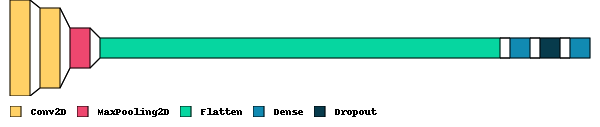

In [7]:
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(28, 28, 1)),
        keras.layers.Conv2D(
            filters=20,
            kernel_size=(5, 5),
            activation=tensorflow.nn.relu,
        ),
        keras.layers.Conv2D(
            filters=40,
            kernel_size=(5, 5),
            activation=tensorflow.nn.relu,
        ),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tensorflow.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10),
    ]
)
model.summary()
visualkeras.layered_view(model, draw_volume=False, legend=True)

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
313/313 [==============================] - 18s 55ms/step - loss: 0.7129 - accuracy: 0.7463
Epoch 2/5
313/313 [==============================] - 21s 68ms/step - loss: 0.4584 - accuracy: 0.8382
Epoch 3/5
313/313 [==============================] - 23s 74ms/step - loss: 0.3746 - accuracy: 0.8649
Epoch 4/5
313/313 [==============================] - 23s 74ms/step - loss: 0.3329 - accuracy: 0.8805
Epoch 5/5
313/313 [==============================] - 24s 77ms/step - loss: 0.2932 - accuracy: 0.8923


In [10]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 5s - loss: 0.3664 - accuracy: 0.8685 - 5s/epoch - 15ms/step


[0.36635082960128784, 0.8684999942779541]

In [11]:
probability_model = keras.Sequential(
    [
        model, keras.layers.Softmax()
    ]
)
predictions = probability_model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


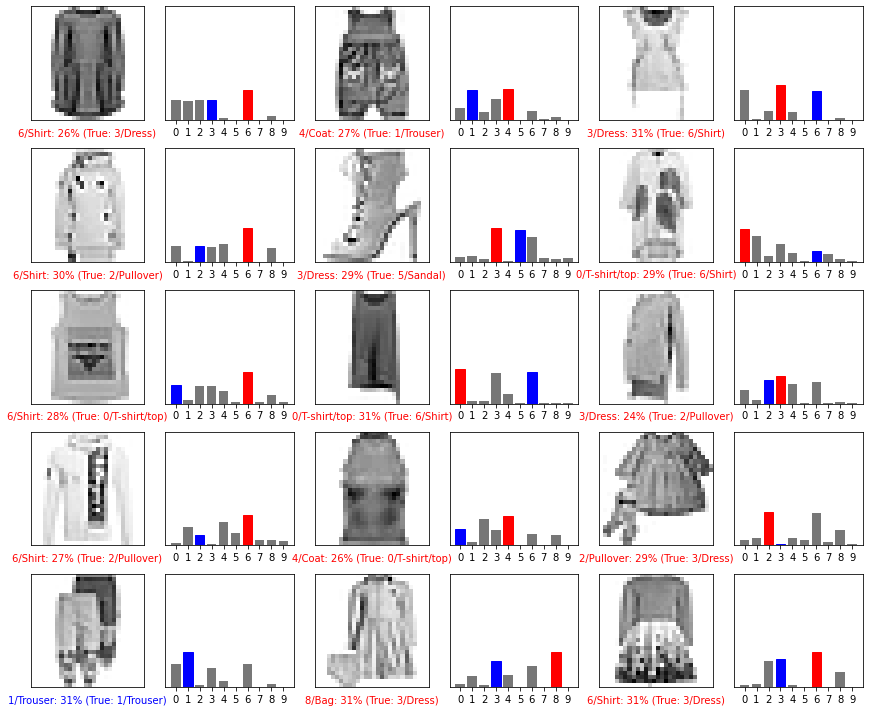

In [25]:
from tf_keras import plot_image, plot_value_array

# Plot the first num_rows*num_cols test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

N = num_cols * num_rows
worst_rank = np.argpartition(np.max(predictions, axis=1), N)[:N]
worst_predictions = predictions[worst_rank]
worst_x = x_test[worst_rank]
worst_y = y_test[worst_rank]

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, worst_predictions[i], worst_y[i], worst_x[i], class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, worst_predictions[i], worst_y[i])

plt.tight_layout()
plt.show()